In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#red wine dataset upload
wine_dataset = pd.read_csv("/content/redwinequality.csv")
wine_dataset

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [ ]:
# number of rows & columns in the dataset
wine_dataset.shape

(1599, 12)

In [ ]:
#display first ten rows
wine_dataset.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
wine_dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#statistical measure of the dataset
wine_dataset.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
# Data Cleaning
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Number of outliers: 29


<Figure size 2000x2000 with 0 Axes>

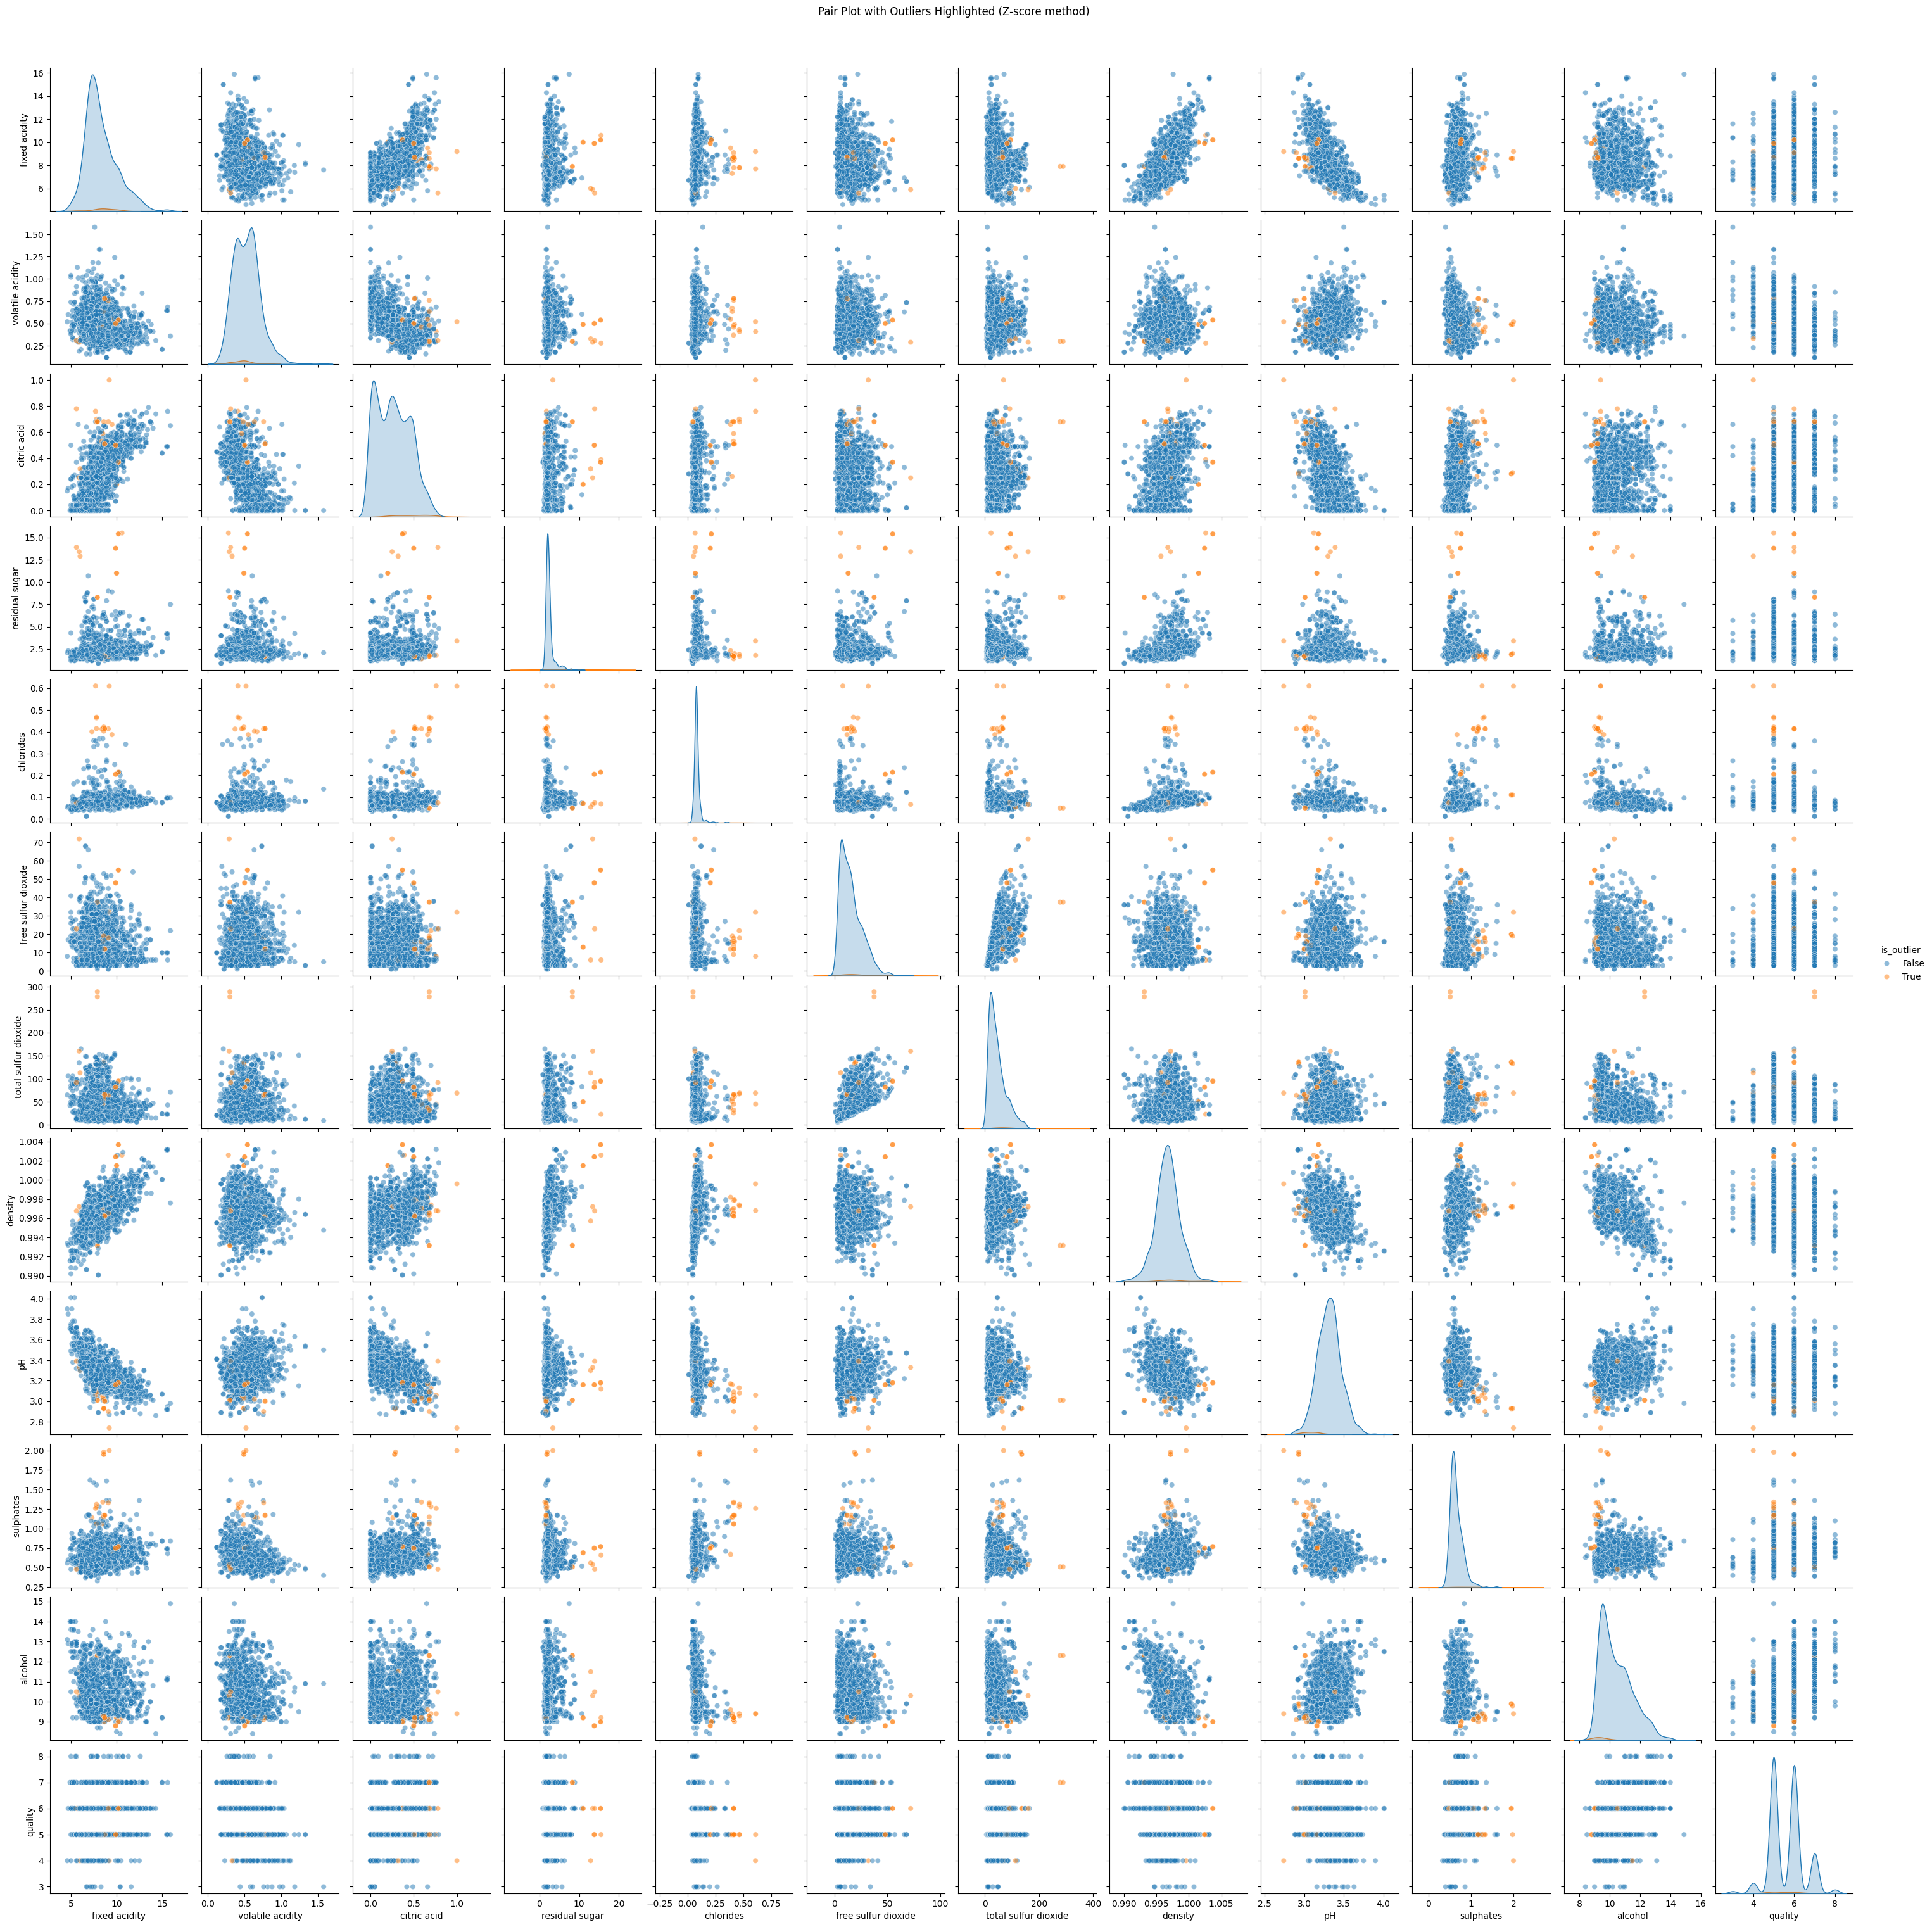

In [ ]:
#Detection of Outliers
z_scores = np.abs(stats.zscore(wine_dataset.drop('quality', axis=1)))
threshold = 6
outliers = (z_scores > threshold).any(axis=1)
print("Number of outliers:", outliers.sum())
wine_dataset['is_outlier'] = outliers
plt.figure(figsize=(20, 20))
sns.pairplot(wine_dataset, hue='is_outlier', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot with Outliers Highlighted (Z-score method)", y=1.02)
plt.show()

In [ ]:
wine_dataset.drop('is_outlier', axis=1, inplace=True)

In [ ]:
wine_dataset.shape

(1599, 12)

In [ ]:
X = wine_dataset.drop('quality', axis=1)
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

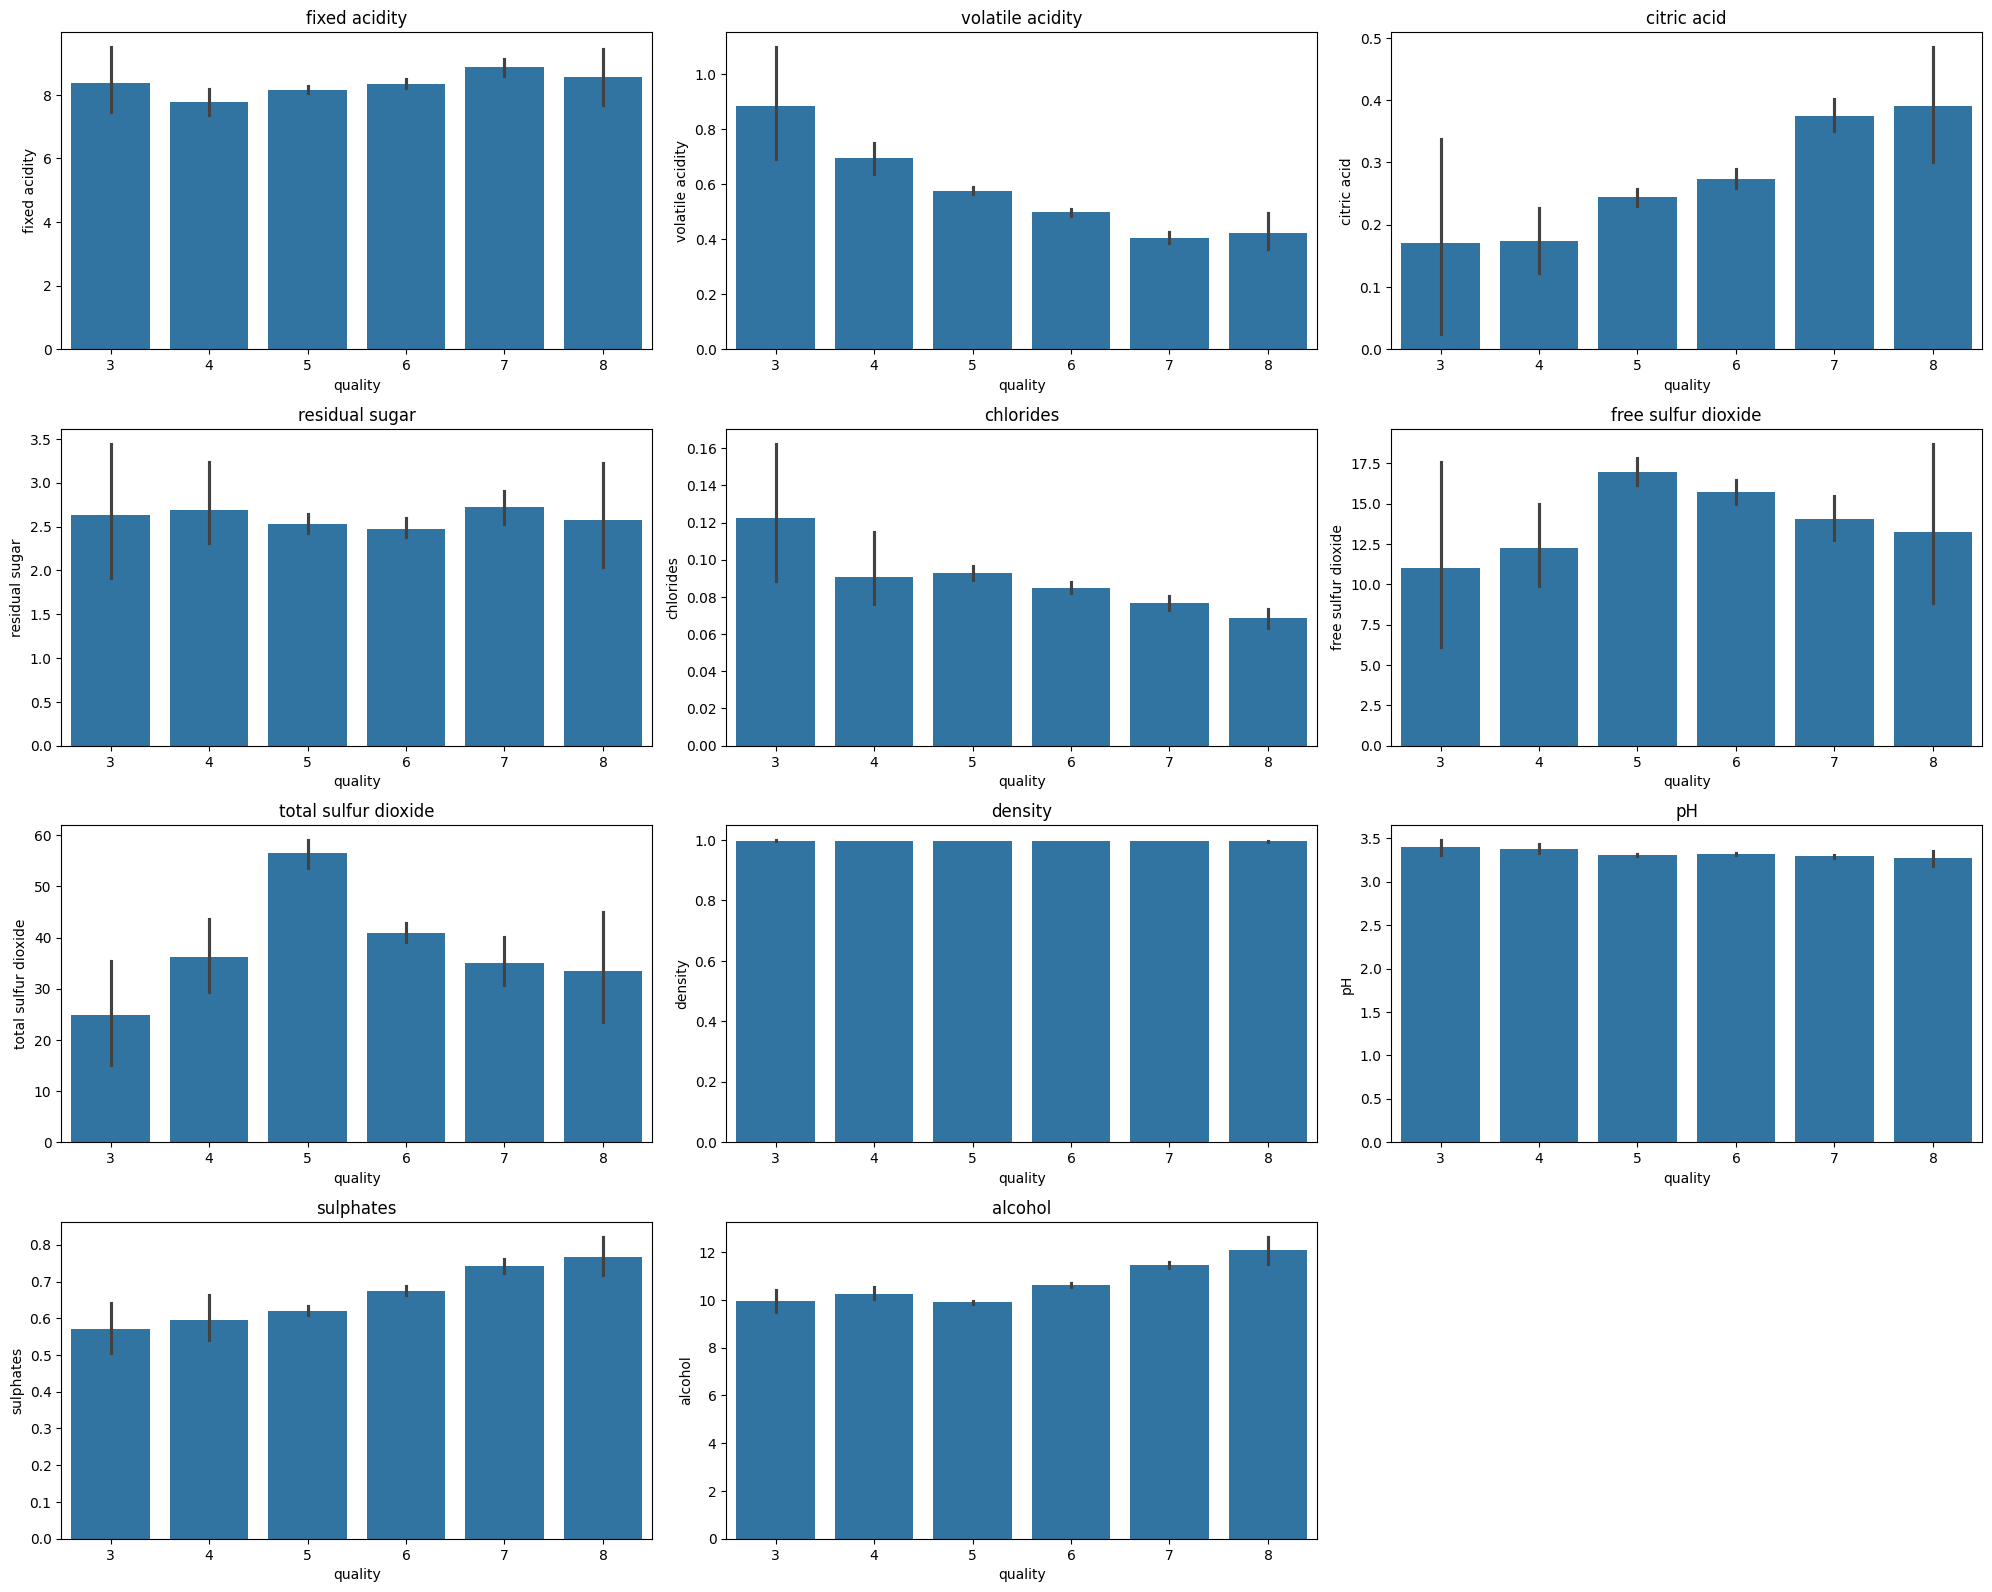

In [ ]:
features = [col for col in wine_dataset.columns if col != 'quality']
n_features = len(features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 4*n_rows))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.barplot(x='quality', y=feature, data=wine_dataset, ax=axes[i])
    axes[i].set_title(feature)
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout(pad=1.0)
plt.show()

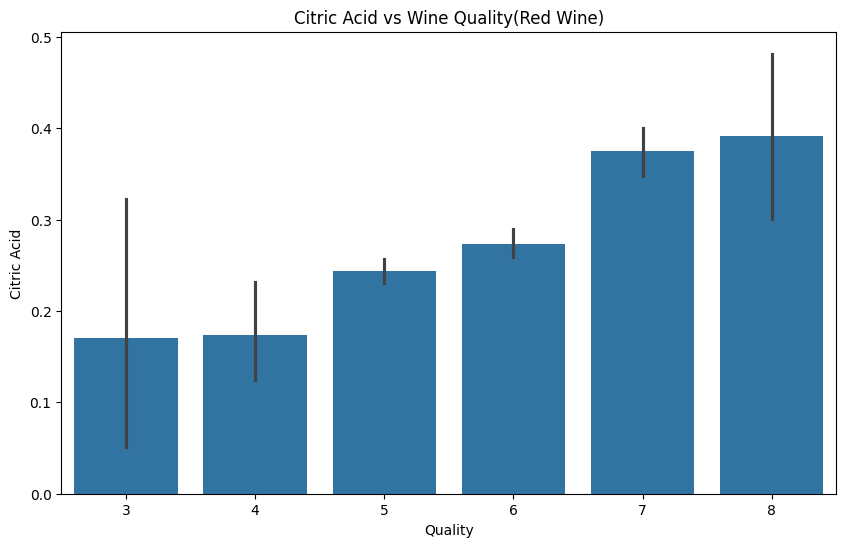

In [ ]:
plot = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='citric acid', data=wine_dataset)
plt.title('Citric Acid vs Wine Quality(Red Wine)')
plt.xlabel('Quality')
plt.ylabel('Citric Acid')
plt.show()

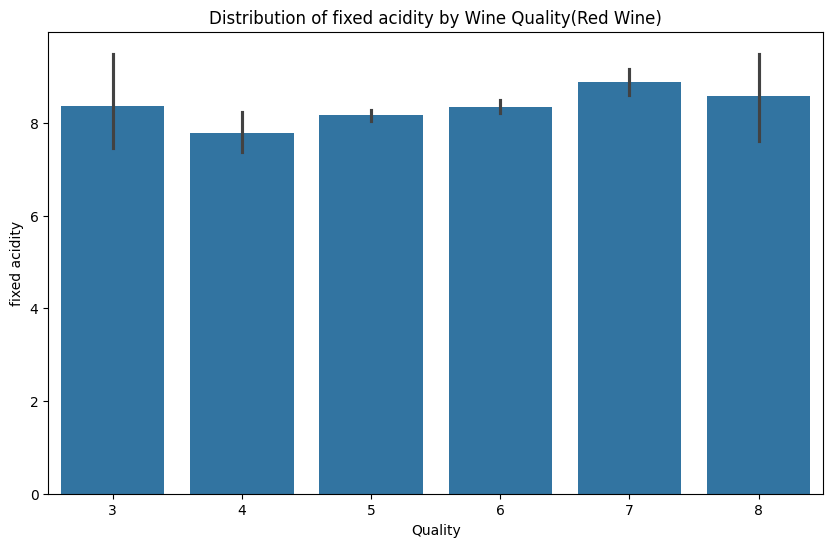

In [ ]:
plot = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='fixed acidity', data=wine_dataset)
plt.title('Distribution of fixed acidity by Wine Quality(Red Wine)')
plt.xlabel('Quality')
plt.ylabel('fixed acidity')
plt.show()

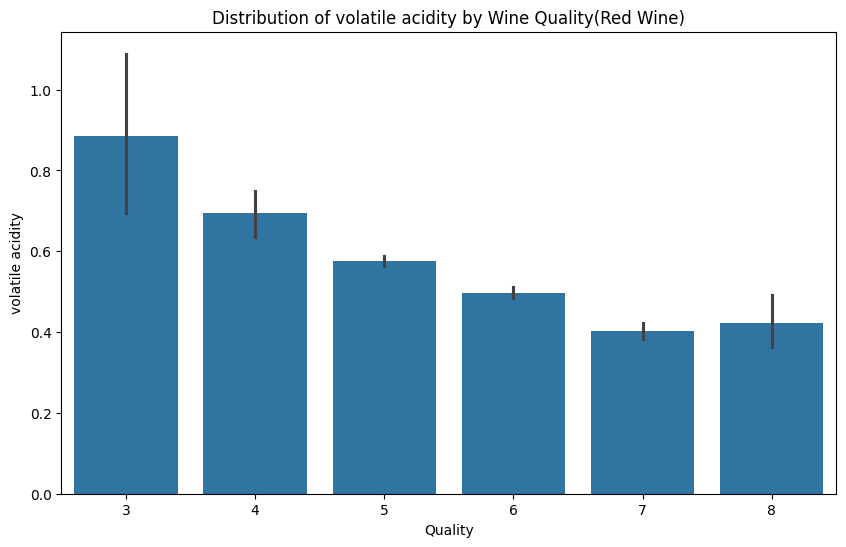

In [ ]:
plot = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='volatile acidity', data=wine_dataset)
plt.title('Distribution of volatile acidity by Wine Quality(Red Wine)')
plt.xlabel('Quality')
plt.ylabel('volatile acidity')
plt.show()

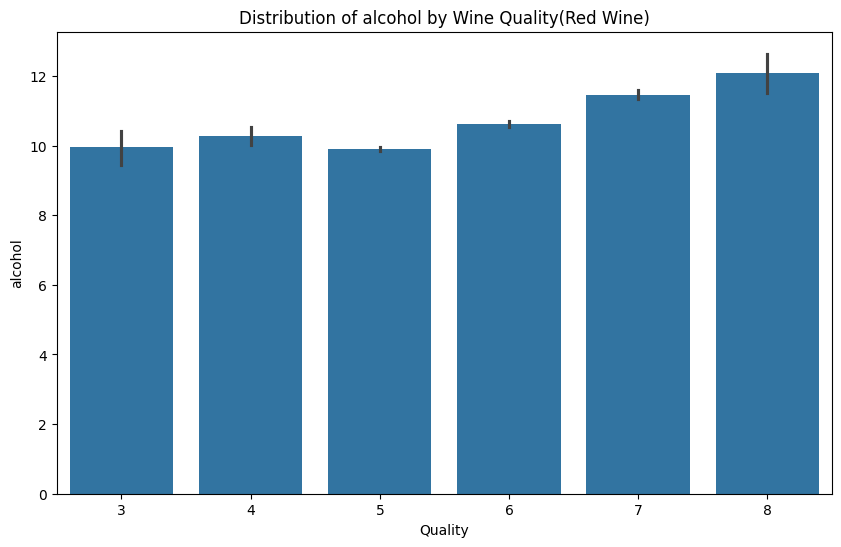

In [ ]:
plot = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='alcohol', data=wine_dataset)
plt.title('Distribution of alcohol by Wine Quality(Red Wine)')
plt.xlabel('Quality')
plt.ylabel('alcohol')
plt.show()

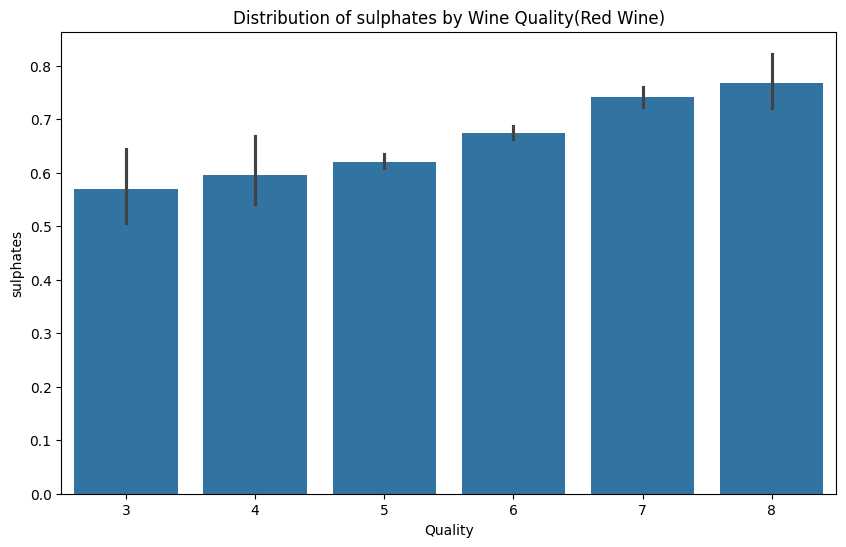

In [ ]:
plot = plt.figure(figsize=(10, 6))
sns.baplot(x='quality', y='sulphates', data=wine_dataset)
plt.title('Distribution of sulphates by Wine Quality(Red Wine)')
plt.xlabel('Quality')
plt.ylabel('sulphates')
plt.show()

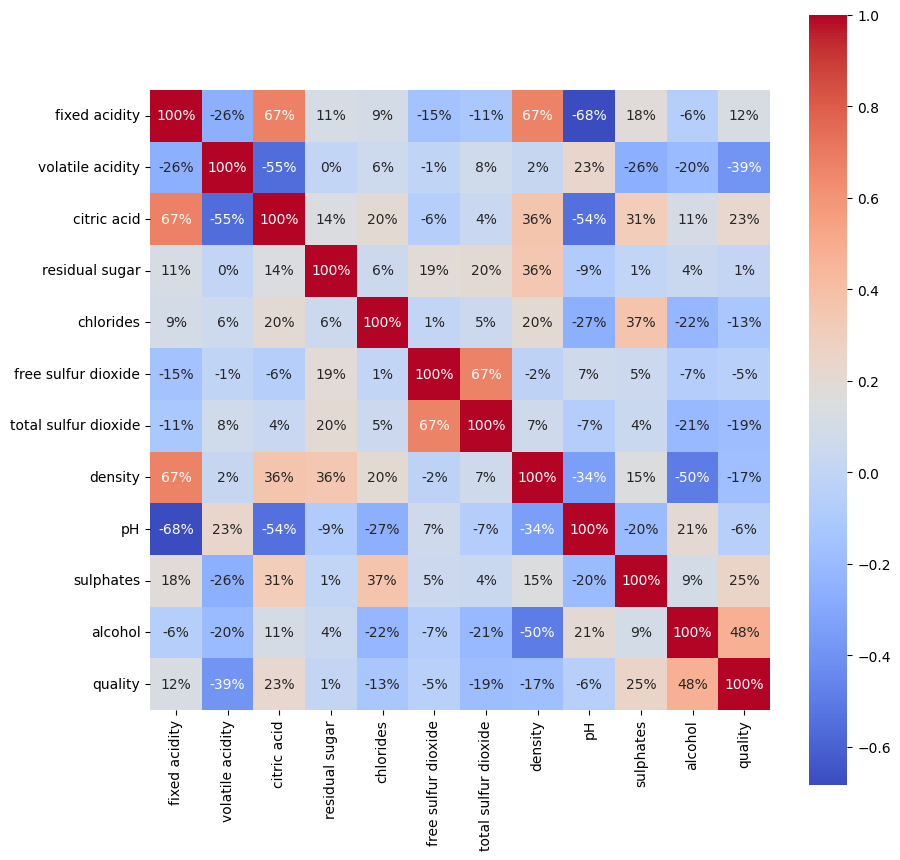

Correlation of different features of our wine_dataset with quality:
fixed acidity : 0.1241
volatile acidity : -0.3906
citric acid : 0.2264
residual sugar : 0.0137
chlorides : -0.1289
free sulfur dioxide : -0.0507
total sulfur dioxide : -0.1851
density : -0.1749
pH : -0.0577
sulphates : 0.2514
alcohol : 0.4762
quality : 1.0000


In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(wine_dataset.corr(method='pearson'), annot=True, cmap='coolwarm',square=True,fmt='.0%')
plt.show()
print('Correlation of different features of our wine_dataset with quality:')
for i in wine_dataset.columns:
  corr, _ = pearsonr(wine_dataset[i], wine_dataset['quality'])
  print('%s : %.4f' %(i,corr))

In [ ]:
#top 5 features with respect to quality
correlations = wine_dataset.corr()['quality'].sort_values(ascending=False).drop('quality')
print(correlations)

alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [ ]:
selected_features = ['alcohol', 'citric acid', 'sulphates', 'fixed acidity', 'residual sugar']
X = wine_dataset[selected_features]
print(X)

      alcohol  citric acid  sulphates  fixed acidity  residual sugar
0         9.4         0.00       0.56            7.4             1.9
1         9.8         0.00       0.68            7.8             2.6
2         9.8         0.04       0.65            7.8             2.3
3         9.8         0.56       0.58           11.2             1.9
4         9.4         0.00       0.56            7.4             1.9
...       ...          ...        ...            ...             ...
1594     10.5         0.08       0.58            6.2             2.0
1595     11.2         0.10       0.76            5.9             2.2
1596     11.0         0.13       0.75            6.3             2.3
1597     10.2         0.12       0.71            5.9             2.0
1598     11.0         0.47       0.66            6.0             3.6

[1599 rows x 5 columns]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=6)

In [ ]:
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(1279, 5) (320, 5) (1279,) (320,)


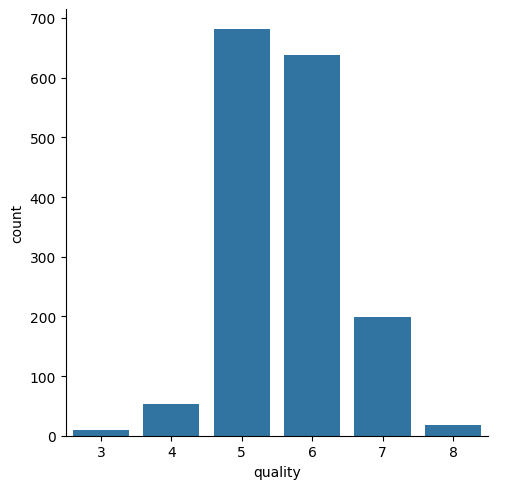

In [ ]:
# number of values for each quality
a=sns.catplot(x='quality', data = wine_dataset, kind = 'count')
print(a)

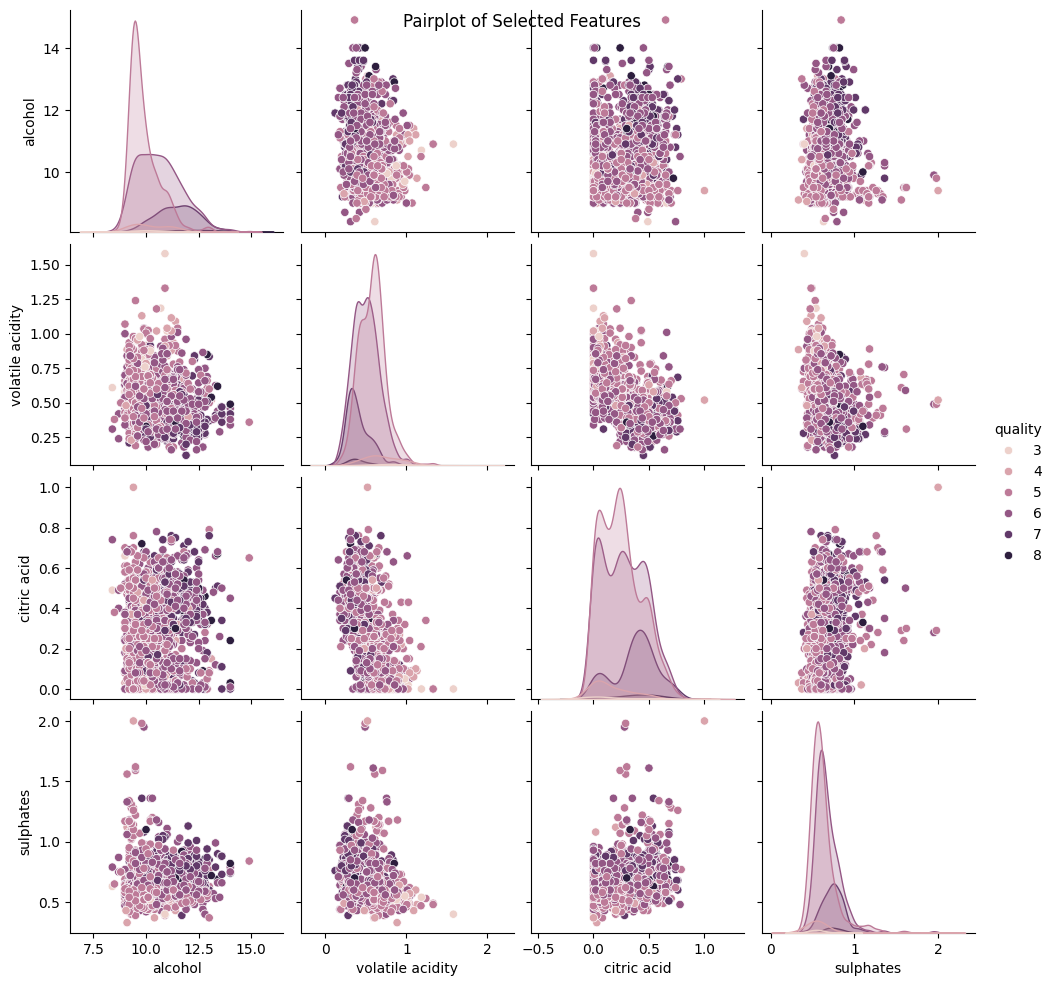

In [ ]:
sns.pairplot(wine_dataset, vars=['alcohol', 'volatile acidity', 'citric acid', 'sulphates'], hue='quality')
plt.suptitle('Pairplot of Selected Features')
plt.show()

SVM

In [ ]:
#SUPORT VECTOR CLASSIFIER
svm_model = SVC()
svm_model.fit(X_train, Y_train)
X_test_prediction_svm = svm_model.predict(X_test)
#accuracy
print(f'Model accuracy score: {round(accuracy_score(X_test_prediction_svm, Y_test) * 100, 2)}%')


Model accuracy score: 88.75%


In [ ]:
# Create a pipeline with StandardScaler and SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=26))
])
# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, Y_train, cv=10, scoring='accuracy')
pipeline.fit(X_train, Y_train)
X_test_prediction_svm = pipeline.predict(X_test)
#accuracy on the test set
print(f'Model accuracy score: {round(accuracy_score(Y_test,X_test_prediction_svm) * 100, 2)}%')
# Create and print DataFrame comparing actual and predicted values
Y_compare_svm = pd.DataFrame({'Actual': Y_test, 'Predicted': X_test_prediction_svm})
print(Y_compare_svm.head())


Model accuracy score: 90.94%
      Actual  Predicted
477        0          0
1135       0          0
911        0          0
302        0          0
649        0          0


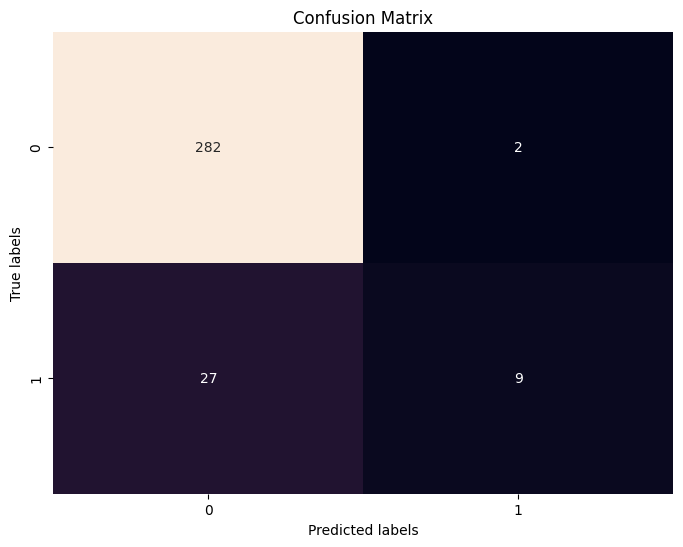

In [ ]:
cm = confusion_matrix(Y_test, X_test_prediction_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


AUC score: 0.62


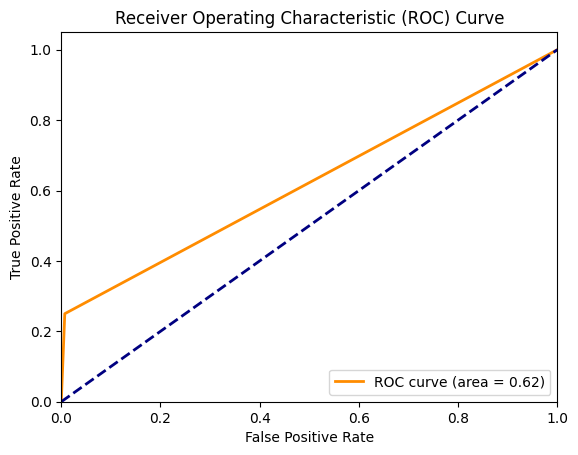

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(Y_test, X_test_prediction_svm)
roc_auc = auc(fpr, tpr)
print(f'AUC score: {roc_auc:.2f}')
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Logistic Regression

In [ ]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, Y_train)
X_test_prediction_logreg = logreg_model.predict(X_test)
# Accuracy on test data using Logistic Regression
print(f'Model accuracy score: {round(accuracy_score(X_test_prediction_logreg, Y_test) * 100, 2)}%')


Model accuracy score: 89.06%


In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic regression', LogisticRegression(random_state=26))
])
# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, Y_train, cv=10, scoring='accuracy')
pipeline.fit(X_train, Y_train)
X_test_prediction_log = pipeline.predict(X_test)
#accuracy on the test set
print(f'Model accuracy score: {round(accuracy_score(X_test_prediction_log, Y_test) * 100, 2)}%')
# Create and print DataFrame comparing actual and predicted values
Y_compare_log = pd.DataFrame({'Actual': Y_test, 'Predicted': X_test_prediction_log})
print(Y_compare_log.head(7))


Model accuracy score: 89.06%
      Actual  Predicted
477        0          0
1135       0          0
911        0          0
302        0          0
649        0          0
52         0          0
702        0          0


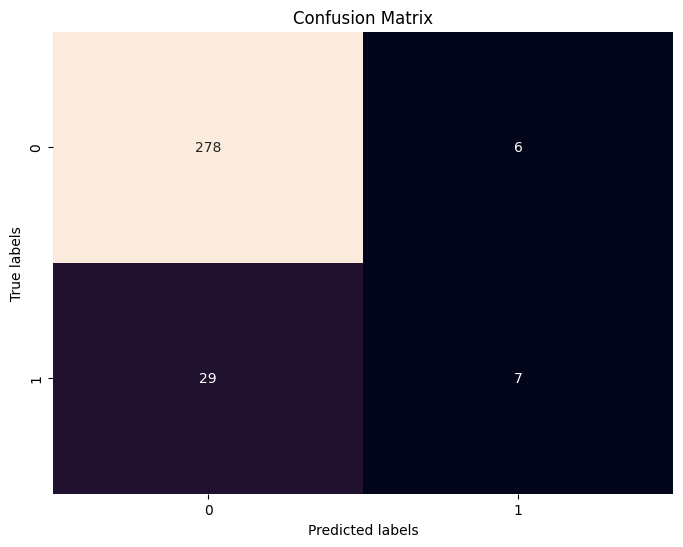

In [ ]:
cm = confusion_matrix( Y_test,X_test_prediction_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Neural Networks

In [ ]:
#NEural Networks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
# Define the neural network model
net = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),  # Dropout layer for regularization
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression task (1 output neuron)
])
# Compile the net
net.compile(optimizer='adam', loss='mean_squared_error')
# Train the net
history = net.fit(X_train, Y_train, epochs=60, batch_size=32, validation_split=0.1)
# Evaluate the net on test data
predictions = net.predict(X_test)
predictions=(predictions>0.5).astype(int)
#accuracy
print(f'net accuracy score: {round(accuracy_score(Y_test,predictions) * 100, 2)}%')


Epoch 1/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.6774 - val_loss: 0.1675
Epoch 2/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4369 - val_loss: 0.1615
Epoch 3/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2969 - val_loss: 0.1337
Epoch 4/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2404 - val_loss: 0.1315
Epoch 5/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2068 - val_loss: 0.1351
Epoch 6/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1796 - val_loss: 0.1274
Epoch 7/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1728 - val_loss: 0.1271
Epoch 8/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1656 - val_loss: 0.1258
Epoch 9/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1601 - val_loss: 0.1326
Epoch 10/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1415 - val_loss: 0.1278
Epoch 11/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1419 - val_loss: 0.1427
Epoch 12/60
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1276 - val_lo

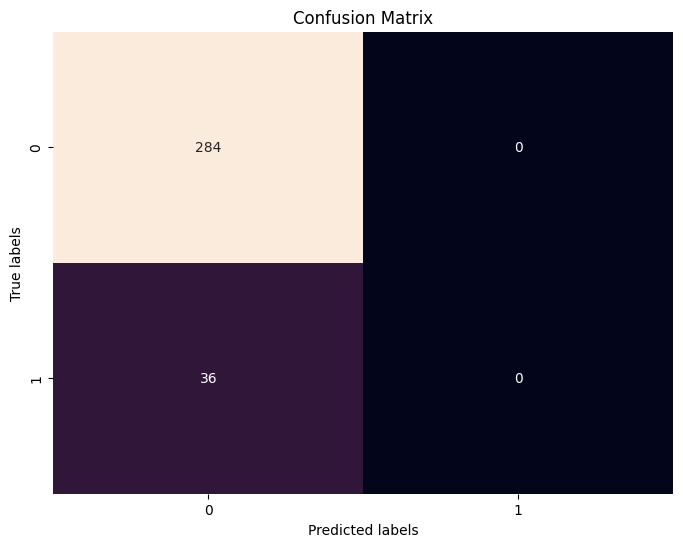

In [ ]:
cm = confusion_matrix( Y_test,predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Random Forest

In [ ]:
model = RFC()
model.fit(X_train, Y_train)
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(f'Model accuracy score: {round(accuracy_score(X_test_prediction, Y_test) * 100, 2)}%')
#actual and predicted values
Y_compare = pd.DataFrame({'Actual' : Y_test, 'Predicted' : X_test_prediction})
print(Y_compare.head())


Model accuracy score: 94.69%
      Actual  Predicted
477        0          0
1135       0          0
911        0          0
302        0          0
649        0          0


In [ ]:
# Create a pipeline with StandardScaler and rfc
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rfc', RFC(random_state=40))
])
# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, Y_train, cv=7, scoring='accuracy')
pipeline.fit(X_train, Y_train)
X_test_prediction_rfc = pipeline.predict(X_test)
#accuracy on the test set
print(f'Model accuracy score: {round(accuracy_score(X_test_prediction_rfc, Y_test) * 100, 2)}%')
# Create and print DataFrame comparing actual and predicted values
Y_compare_rfc = pd.DataFrame({'Actual': Y_test, 'Predicted': X_test_prediction_rfc})
print(Y_compare_rfc.head(8))


Model accuracy score: 92.19%
      Actual  Predicted
477        0          1
1135       0          0
911        0          0
302        0          0
649        0          0
52         0          0
702        0          0
191        0          0


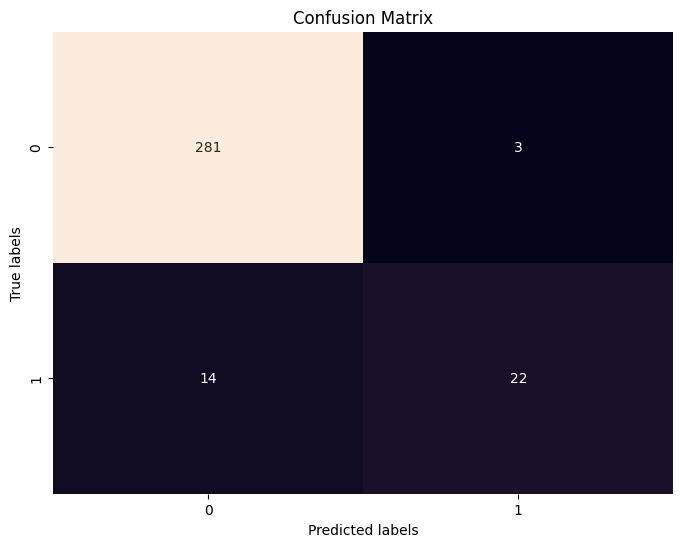

In [ ]:
cm = confusion_matrix(  Y_test,X_test_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


AUC score: 0.92


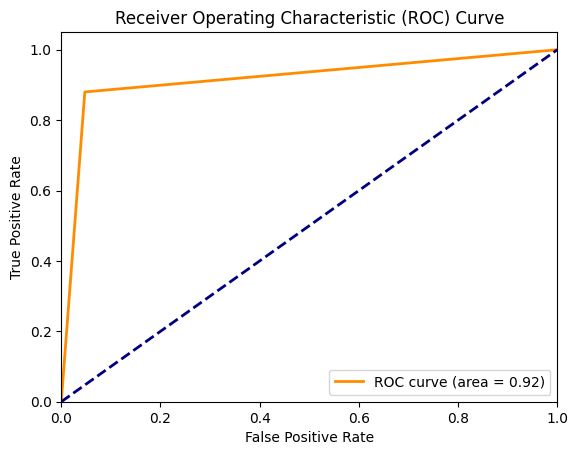

In [ ]:
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(X_test_prediction, Y_test)
roc_auc = auc(fpr, tpr)
print(f'AUC score: {roc_auc:.2f}')
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import numpy as np
# Simulated accuracy values from multiple runs
accuracy_values = np.array([0.934,0.928,0.937,0.940,0.946])
# Calculate the mean accuracy
mean_accuracy = np.mean(accuracy_values)
# Calculate the standard deviation of the accuracy values
std_dev_accuracy = np.std(accuracy_values,ddof=1)
# Calculate the standard error
n_runs = len(accuracy_values)
standard_error = std_dev_accuracy / np.sqrt(n_runs)
#error rate
error_rate = 1 - accuracy_score(X_test_prediction, Y_test)
print(f'Error rate:{round(error_rate *100 ,2)}%')
print(f"Standard Error of Accuracy: {standard_error}")

Error rate:5.31%
Standard Error of Accuracy: 0.00299999999999998


K-Nearest Neighbour

In [ ]:
#K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, Y_train)
X_test_prediction_knn = knn.predict(X_test)
# Accuracy on test data using KNN
print(f'Model accuracy score: {round(accuracy_score(X_test_prediction_knn, Y_test) * 100, 2)}%')


Model accuracy score: 88.75%


In [ ]:
pipeline=Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=32))
])
cv_scores = cross_val_score(pipeline, X_train, Y_train, cv=10, scoring='accuracy')
pipeline.fit(X_train, Y_train)
X_test_prediction_knn = pipeline.predict(X_test)
#accuracy on the test set
print(f'Model accuracy score: {round(accuracy_score(X_test_prediction_knn, Y_test) * 100, 2)}%')


Model accuracy score: 89.38%


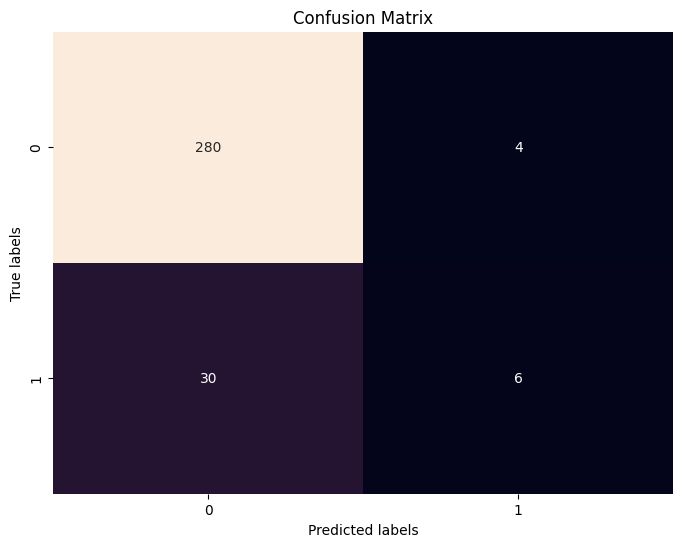

In [ ]:
cm = confusion_matrix(  Y_test,X_test_prediction_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Gradient Boosting

In [ ]:
gb_model = GradientBoostingClassifier()
# Train the Gradient Boosting model
gb_model.fit(X_train, Y_train)
# Predict on test data
X_test_prediction_gb = gb_model.predict(X_test)
# Accuracy on test data using Gradient Boosting
test_data_accuracy_gb = accuracy_score(X_test_prediction_gb, Y_test)
print(f'Model accuracy score: {round(accuracy_score(X_test_prediction_gb, Y_test) * 100, 2)}%')
#actual and predicted values
Y_compare_gb = pd.DataFrame({'Actual' : Y_test, 'Predicted' : X_test_prediction_gb})
print(Y_compare_gb.head())


Model accuracy score: 90.31%
      Actual  Predicted
477        0          0
1135       0          0
911        0          0
302        0          0
649        0          0


In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gba', GradientBoostingClassifier(random_state=42))
])
# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, Y_train, cv=10, scoring='accuracy')
pipeline.fit(X_train, Y_train)
X_test_prediction_gbr = pipeline.predict(X_test)
#accuracy on the test set
print(f'Model accuracy score: {round(accuracy_score(X_test_prediction_gbr, Y_test) * 100, 2)}%')
# Create and print DataFrame comparing actual and predicted values
Y_compare_gbr = pd.DataFrame({'Actual': Y_test, 'Predicted': X_test_prediction_gbr})
print(Y_compare_gbr.head(10))


Model accuracy score: 90.94%
      Actual  Predicted
477        0          0
1135       0          0
911        0          0
302        0          0
649        0          0
52         0          0
702        0          0
191        0          0
111        0          0
892        0          0


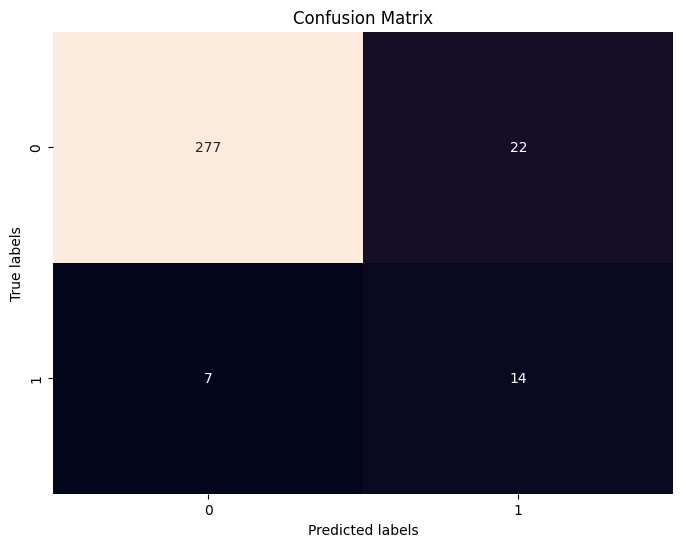

In [ ]:
cm = confusion_matrix(X_test_prediction_gbr, Y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Stochastic Gradient decent Classifier

> Add blockquote



In [ ]:
#stochastic Gradient Decent Classifier
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
pred_sgd1 = sgd.predict(X_test)
accuracy_sgd = accuracy_score(Y_test, pred_sgd1)
print(f'Model accuracy score: {round(accuracy_score(pred_sgd1, Y_test) * 100, 2)}%')
#actual and predicted values
Y_compare_sgd = pd.DataFrame({'Actual' : Y_test, 'Predicted' : pred_sgd1})
print(Y_compare_sgd.head())


Model accuracy score: 89.38%
      Actual  Predicted
477        0          0
1135       0          0
911        0          0
302        0          0
649        0          0


In [ ]:
#using k-fold cross validation
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDClassifier(random_state=7))
])
cv_scores = cross_val_score(pipeline, X_train, Y_train, cv=5, scoring='accuracy')
pipeline.fit(X_train, Y_train)
pred_sgd = pipeline.predict(X_test)
#accuracy on the test set
print(f'Model accuracy score: {round(accuracy_score(pred_sgd, Y_test) * 100, 2)}%')
# Create and print DataFrame comparing actual and predicted values
Y_compare_sgd = pd.DataFrame({'Actual': Y_test, 'Predicted': pred_sgd})
print(Y_compare_sgd.head(17))


Model accuracy score: 88.75%
      Actual  Predicted
477        0          0
1135       0          0
911        0          1
302        0          0
649        0          0
52         0          0
702        0          0
191        0          0
111        0          0
892        0          0
510        0          0
934        0          0
1519       0          0
1422       0          0
834        0          0
1194       0          0
972        1          0


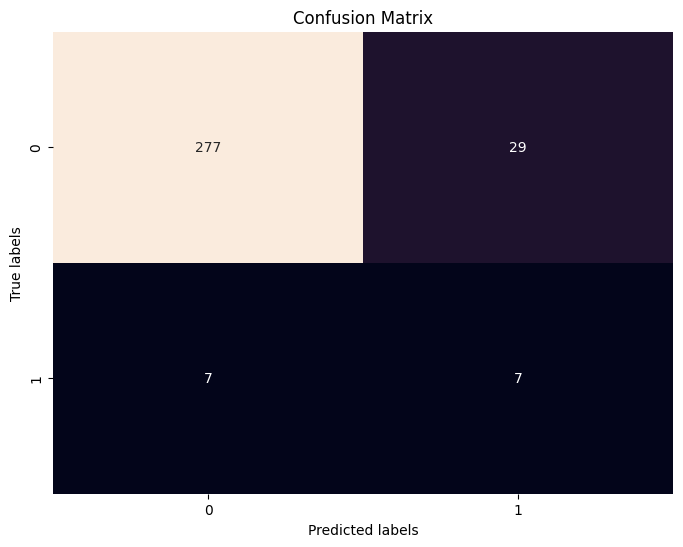

In [ ]:
cm = confusion_matrix(pred_sgd, Y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import warnings
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,mean_squared_error,mean_absolute_error
warnings.filterwarnings('ignore')
ptbl = PrettyTable()
ptbl.field_names = ["Regressor Model","Accuracy", "Precision", "Recall", "F1Score"," mean_squared_error","mean_absolute_error"]
ptbl.add_row(["Random Forest", accuracy_score(X_test_prediction, Y_test),precision_score(X_test_prediction, Y_test, average = 'weighted'),
           recall_score(X_test_prediction, Y_test, average = 'weighted'), f1_score(X_test_prediction, Y_test, average = 'weighted'),mean_squared_error(X_test_prediction, Y_test),mean_absolute_error(X_test_prediction, Y_test)])
ptbl.add_row(["SVM", accuracy_score(X_test_prediction_svm, Y_test),precision_score(X_test_prediction_svm, Y_test, average = 'weighted'),
           recall_score(X_test_prediction_svm, Y_test, average = 'weighted'), f1_score(X_test_prediction_svm, Y_test, average = 'weighted'), mean_squared_error(X_test_prediction_svm, Y_test),mean_absolute_error(X_test_prediction_svm, Y_test)])
ptbl.add_row(["Gradient Boosting", accuracy_score(X_test_prediction_gbr, Y_test),precision_score(X_test_prediction_gbr, Y_test, average = 'weighted'),
           recall_score(X_test_prediction_gbr, Y_test, average = 'weighted'), f1_score(X_test_prediction_gbr, Y_test, average = 'weighted'),mean_squared_error(X_test_prediction_gbr, Y_test),mean_absolute_error(X_test_prediction_gbr, Y_test)])
ptbl.add_row(["KNN", accuracy_score(X_test_prediction_knn, Y_test),precision_score(X_test_prediction_knn, Y_test, average = 'weighted'),
           recall_score(X_test_prediction_knn, Y_test, average = 'weighted'), f1_score(X_test_prediction_knn, Y_test, average = 'weighted'),mean_squared_error(X_test_prediction_knn, Y_test),mean_absolute_error(X_test_prediction_knn, Y_test)])
ptbl.add_row(["Logistic Regression", accuracy_score(X_test_prediction_logreg, Y_test),precision_score(X_test_prediction_logreg, Y_test, average = 'weighted'),
           recall_score(X_test_prediction_logreg, Y_test, average = 'weighted'), f1_score(X_test_prediction_logreg, Y_test, average = 'weighted'),mean_squared_error(X_test_prediction_logreg, Y_test),mean_absolute_error(X_test_prediction_logreg, Y_test)])
ptbl.add_row(["Neural Network", accuracy_score(Y_test,predictions),precision_score(Y_test,predictions, average = 'weighted'),
           recall_score(Y_test,predictions, average = 'weighted'), f1_score(Y_test,predictions, average = 'weighted'),mean_squared_error(Y_test,predictions),mean_absolute_error(Y_test,predictions)])
ptbl.add_row(["SGDClassifier", accuracy_score(Y_test, pred_sgd1),precision_score(Y_test, pred_sgd1, average = 'weighted'),
           recall_score(Y_test, pred_sgd1, average = 'weighted'), f1_score(Y_test, pred_sgd1, average = 'weighted'),mean_squared_error(Y_test, pred_sgd1),mean_absolute_error(Y_test, pred_sgd1)])

print(ptbl)


+---------------------+----------+--------------------+----------+--------------------+---------------------+---------------------+
|   Regressor Model   | Accuracy |     Precision      |  Recall  |      F1Score       |  mean_squared_error | mean_absolute_error |
+---------------------+----------+--------------------+----------+--------------------+---------------------+---------------------+
|    Random Forest    | 0.946875 | 0.9598799393583726 | 0.946875 | 0.9511603173929046 |       0.053125      |       0.053125      |
|         SVM         | 0.909375 | 0.967418573943662  | 0.909375 | 0.9315670858598544 |       0.090625      |       0.090625      |
|  Gradient Boosting  | 0.909375 | 0.9368654636150235 | 0.909375 | 0.920133497336824  |       0.090625      |       0.090625      |
|         KNN         | 0.89375  | 0.9603139671361504 | 0.89375  | 0.9214518372127067 |       0.10625       |       0.10625       |
| Logistic Regression | 0.890625 | 0.9543537265258216 | 0.890625 | 0.9174085

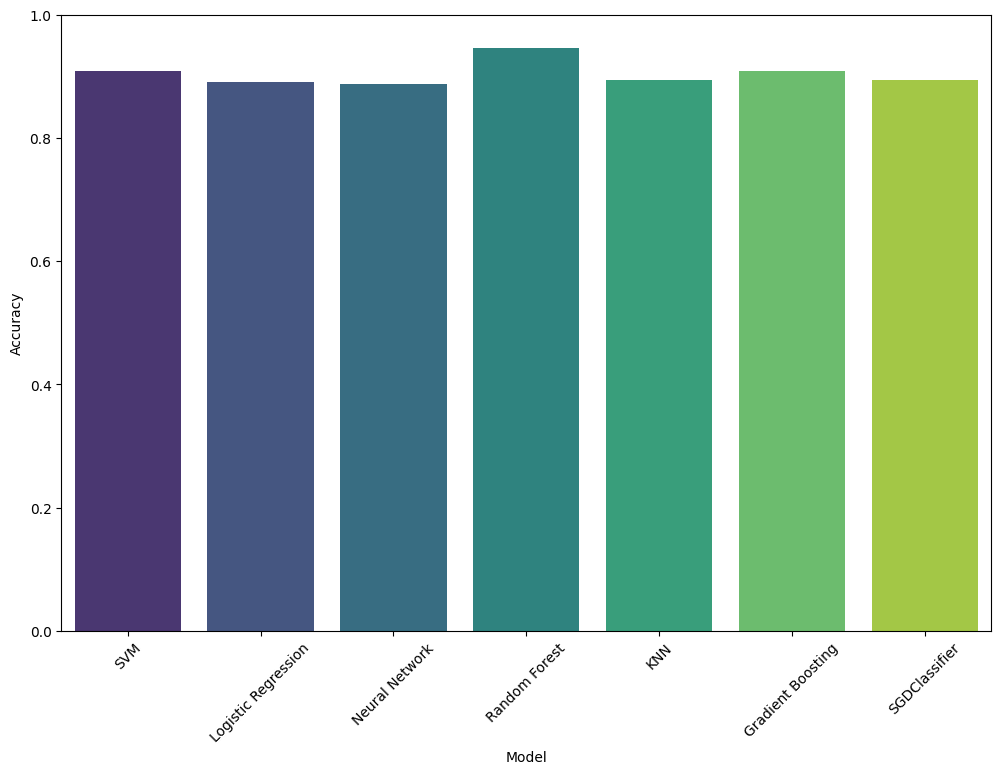

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score

# Define the models and their predictions and true labels
models = [
    ("SVM", X_test_prediction_svm, Y_test),
    ("Logistic Regression", X_test_prediction_log, Y_test),
    ("Neural Network", predictions, Y_test),
    ("Random Forest", X_test_prediction, Y_test),
    ("KNN", X_test_prediction_knn, Y_test),
    ("Gradient Boosting", X_test_prediction_gbr, Y_test),
    ("SGDClassifier", pred_sgd1, Y_test)
]

# Create lists to store model names and corresponding accuracies
model_names = []
accuracies = []

# Evaluate each model and collect accuracies
for model_name, y_pred, y_true in models:
    # Convert predictions to binary class labels if needed
    if model_name == "Neural Network":
        y_pred = (y_pred > 0.5).astype(int).flatten()

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Append model name and accuracy to lists
    model_names.append(model_name)
    accuracies.append(accuracy)

# Create a DataFrame for easier plotting
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

# Plotting the accuracy graph
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette="viridis")
# plt.title("Comparison of Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 for accuracy values
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()